In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Plotting settings
%matplotlib inline
sns.set(style="whitegrid")


In [3]:
# Load the dataset
df = pd.read_csv("netflix_titles.csv")

# Display first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Check data types and null values
df.info()

# Descriptive statistics (including object types)
df.describe(include='all')

# Null values per column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

C:\Users\bhosl\AppData\Local\Temp\ipykernel_29944\2790374991.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


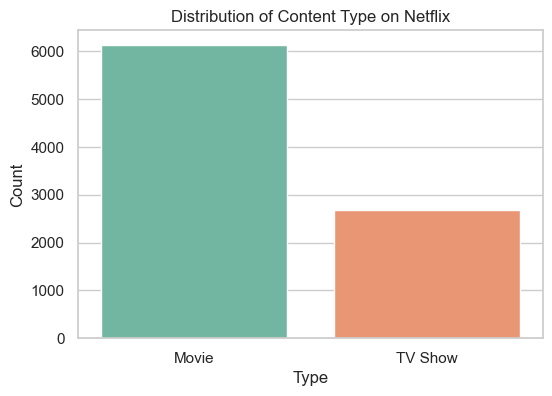

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content Type on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


C:\Users\bhosl\AppData\Local\Temp\ipykernel_29944\1851857649.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts, y=genre_labels, palette='Set3')


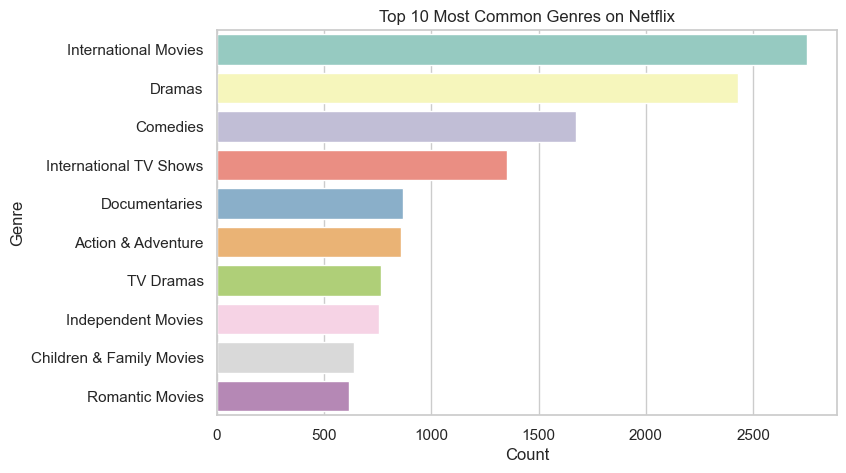

In [6]:
# Flatten genre list and count top 10
genres = ", ".join(df['listed_in'].dropna()).split(", ")
top_genres = Counter(genres).most_common(10)
genre_labels, genre_counts = zip(*top_genres)

plt.figure(figsize=(8, 5))
sns.barplot(x=genre_counts, y=genre_labels, palette='Set3')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


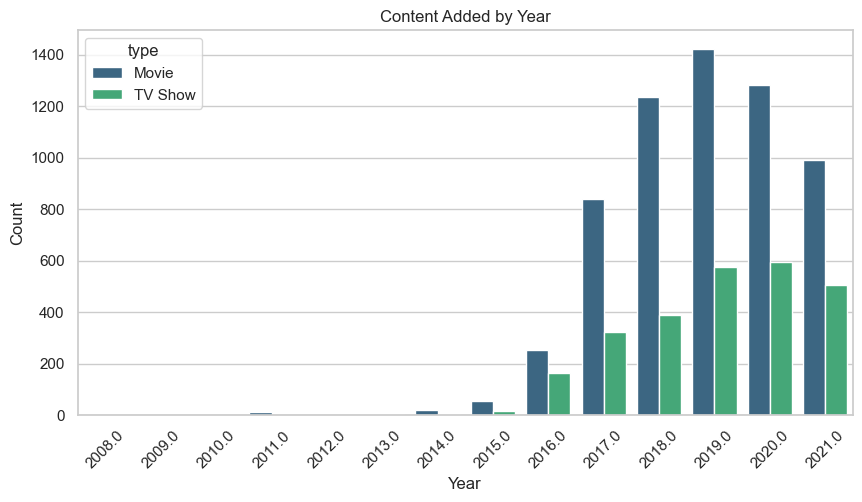

In [7]:
# Convert date column
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='year_added', hue='type', palette='viridis')
plt.title('Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\bhosl\AppData\Local\Temp\ipykernel_29944\215706511.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='coolwarm')


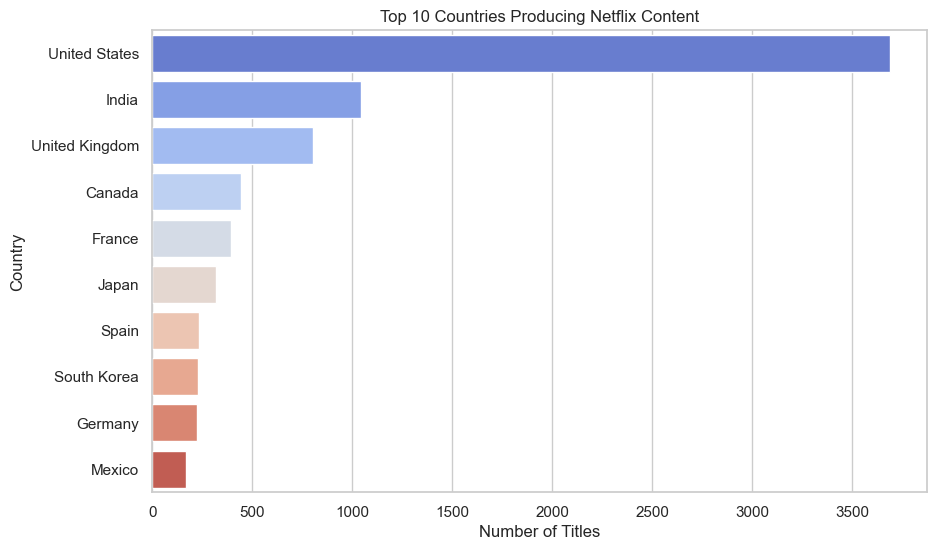

In [8]:
# Count country appearances
top_countries_series = df['country'].dropna().str.split(', ')
flat_countries = [country for countries in top_countries_series for country in countries]
top_10_countries = pd.Series(flat_countries).value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='coolwarm')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


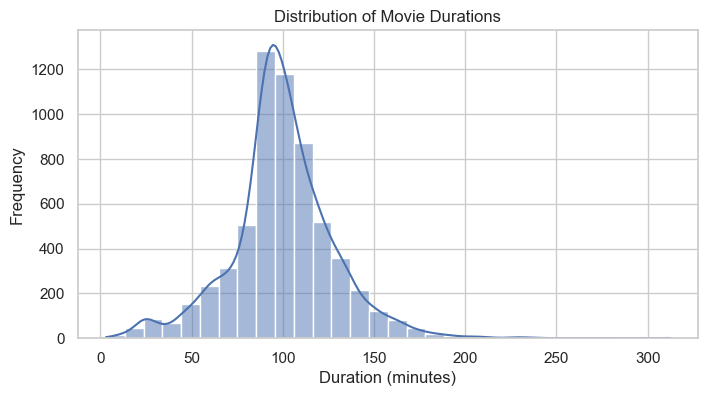

In [9]:
# Filter only Movies
movies = df[df['type'] == 'Movie'].copy()

# Convert duration to numeric
movies['duration'] = movies['duration'].str.replace(' min', '', regex=False)
movies['duration'] = pd.to_numeric(movies['duration'], errors='coerce')

plt.figure(figsize=(8, 4))
sns.histplot(movies['duration'].dropna(), bins=30, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


C:\Users\bhosl\AppData\Local\Temp\ipykernel_29944\1957315770.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')


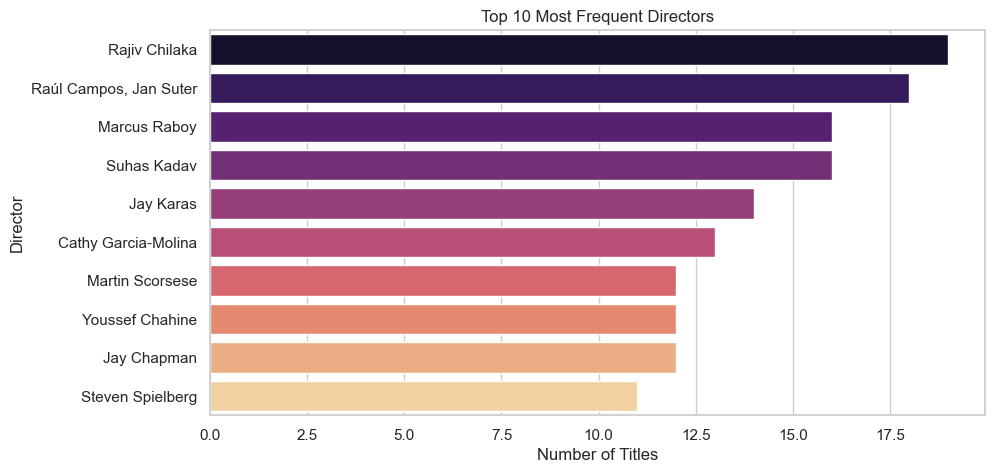

In [10]:
top_directors = df['director'].dropna().value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()
